In [178]:
cd /content/drive/MyDrive/CIS 581/final_project

/content/drive/MyDrive/CIS 581/final_project


In [233]:
import cv2
import numpy as np
from detection import detect_faces
from feature_extraction import extract_feature
from morphing import ImageMorphingTriangulation, face_swap
from blending import blending
from optical_flow import optical_flow
from google.colab.patches import cv2_imshow
import scipy
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
import scipy.signal as signal


In [180]:
video_source = './2.mp4'
video_target = './1.mp4'

frame_rate = 5
needDetection = True

In [181]:
cap_source = cv2.VideoCapture(video_source)
cap_target = cv2.VideoCapture(video_target)

In [182]:
source_num_frame = int(cap_source.get(cv2.CAP_PROP_FRAME_COUNT))
target_num_frame = int(cap_target.get(cv2.CAP_PROP_FRAME_COUNT))
num_frame = min(source_num_frame, target_num_frame)

count_frame = 0

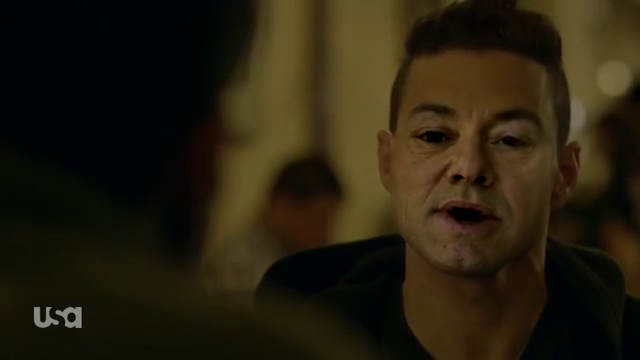

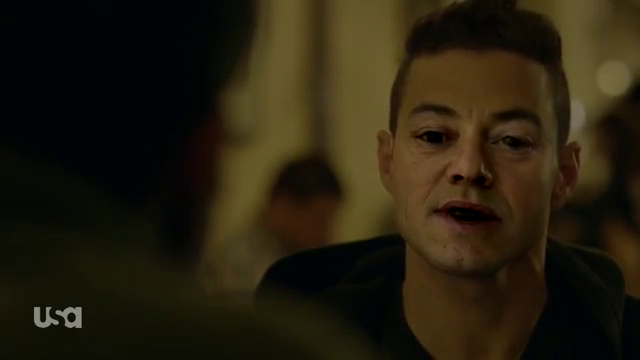

In [235]:
i = 0
while i < 1:
    i += 1
    is_source, source_frame = cap_source.read()
    is_target, target_frame = cap_target.read()
    if is_source and is_target and count_frame < num_frame:
        count_frame += 1
        target_pos_frame = cap_target.get(cv2.CAP_PROP_POS_FRAMES)
        if (target_pos_frame - 1) % frame_rate == 0 or needDetection:
            # STEP 1: Do detection
            det_source = detect_faces(source_frame)
            det_target = detect_faces(target_frame)

            # STEP 2: Extract feature points
            feature_source = extract_feature(source_frame, det_source)[0]
            feature_target = extract_feature(target_frame, det_target)[0]

            # STEP 3: Face Warping
            dissolved_pic = ImageMorphingTriangulation(source_frame, target_frame, feature_source, feature_target)
            convexhull, result = face_swap(source_frame, target_frame, feature_source, feature_target, dissolved_pic)

            # STEP 4: Seamless Blending
            frame1_head_mask = cv2.fillConvexPoly(np.zeros_like(source_frame[:, :, 0]), convexhull, 255)
            (x, y, w, h) = cv2.boundingRect(convexhull)
            center_face = (int((x + x + w) / 2), int((y + y + h) / 2))

            output = cv2.seamlessClone(result, source_frame, frame1_head_mask, center_face, cv2.NORMAL_CLONE)
            cv2_imshow(output)
            output = cv2.seamlessClone(result, source_frame, frame1_head_mask, center_face, cv2.MIXED_CLONE)
            cv2_imshow(output)

            prev_target_frame = target_frame
            needDetection = True